<a href="https://colab.research.google.com/github/George-k-tech/Compiler-construction-/blob/main/Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members**
121274,

112270,

118518,

115878

120922


# **Lab One**

Give brief descriptions of the following tools:

Flex, Bison, Lex, Yacc

The description should have: 3-5 lines definition, diagram and code snippet

Submit a text file having the link to your Github repo having the colab/jupyter nb file.

# **Flex**
Flex is a tool for generating scanners that are programs which recognize lexical patterns in text. It reads the given input file for a description of the scanner to generate. The description is a combination of regular expressions and C code pairs called rules. Flex generates a C source file as output.

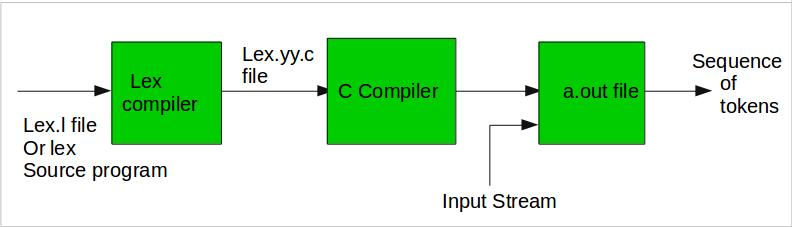

Here is an example:
```
int num_lines = 0, num_chars = 0;

%%
\n    ++num_lines; ++num_chars;
.     ++num_chars;

%%
main()
    {
    yylex();
    printf( "# of lines = %d, # of chars = %d\n",
            num_lines, num_chars );
    }
```
This scanner counts the number of characters and the number of lines in its input. The first line declares two globals, num_lines and num_chars, which are accessible both inside yylex and in the main routine declared after the second `%%'. There are two rules, one which matches a newline (`\n') and increments both the line count and the character count, and one which matches any character other than a newline (indicated by the `.' regular expression).

# **Bison**

Bison is a general-purpose generator that converts  grammar description(Bison Grammar files) for an LALR(1) context-free grammar into a C program to parse that grammar.



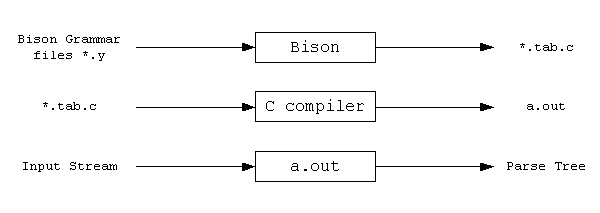

**Steps to use Bison:**

 Write a lexical analyzer to process input and pass tokens to the parser (calc.lex).

 Write the grammar specification for bison (calc.y), including grammar rules, yyparse() and yyerror().

 Run Bison on the grammar to produce the parser. (Makefile)

 Compile the code output by Bison, as well as any other source files.
 
 Link the object files to produce the finished product.
```
 /* simplest version of calculator */

%{

#include <stdio.h>

%}


/* declare tokens */

%token NUMBER

%token ADD SUB MUL DIV ABS

%token EOL


%%

calclist: /* nothing */          
             matches at beginning of input

 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression

 ;

exp: factor       default $$ = $1 

 | exp ADD factor { $$ = $1 + $3; }

 | exp SUB factor { $$ = $1 - $3; }

 ;

factor: term       default $$ = $1 

 | factor MUL term { $$ = $1 * $3; }

 | factor DIV term { $$ = $1 / $3; }

 ;

term: NUMBER  default $$ = $1 

 | ABS term   { $$ = $2 >= 0? $2 : - $2; }

;

%%

main(int argc, char **argv)

{

  yyparse();

}


yyerror(char *s)

{

  fprintf(stderr, "error: %s\n", s);
  
}
```



# **Lex**
LEX is a program generator designed for lexical processing of character input/output stream. Anything from simple text search program that looks for pattern in its input-output file to a C compiler that transforms a program into optimized code.


In program with structure input-output two tasks occurs over and over. It can divide the input-output into meaningful units and then discovering the relationships among the units for C program (the units are variable names, constants, and strings). This division into units (called tokens) is known as lexical analyzer or LEXING. LEX helps by taking a set of descriptions of possible tokens n producing a routine called a lexical analyzer or LEXER or Scanner.

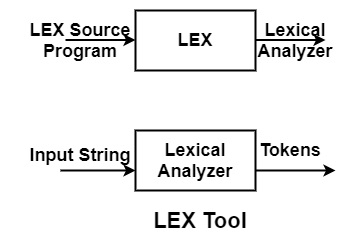

**LEX Source Program**
It is a language used for specifying or representing Lexical Analyzer.

There are two parts of the LEX source program −

*   **Auxiliary Definitions**
*   **Translation Rules**




*   **Auxiliary Definition**

It denotes the regular expression of the form.

Distinct Names [D1 = R1\D2 = R2\Dn = Rn] Regular Expressions

Where:

*  Distinct Names (Di)→ Shortcut name of Regular Expression
*  Regular Expression (Ri)→ Notation to represent a collection of input symbols.

#Examples

Auxiliary Definition for Identifiers −
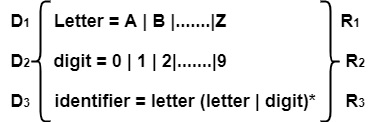



**Auxiliary Definition for Signed Numbers**

integer=digit digit*

sign = + | -

signedinteger = sign integer

**Auxiliary Definition for Decimal Numbers**

decimal = signedinteger . integer | sign.integer

**Auxiliary Definition for Exponential Numbers**

Exponential – No = (decimal | signedinteger) E signedinteger

**Auxiliary Definition for Real Numbers**

Real-No. = decimal | Exponential – No

**Translation Rules**
It is a set of rules or actions which tells Lexical Analyzer what it has to do or what it has to return to parser on encountering the token.

It consists of statements of the form −

**P1** {Action1}
**P2** {Action2}
.
.
.
**Pn** {Actionn}

Where

**Pi** → Pattern or Regular Expression consisting of input alphabets and Auxiliary definition names.

**Actioni** → It is a piece of code that gets executed whenever a token is Recognized. Each Actioni specifies a set of statements to be executed whenever each regular expression or pattern **Pi** matches with the input string.

**Example**

**Translation Rules for "Keywords"**
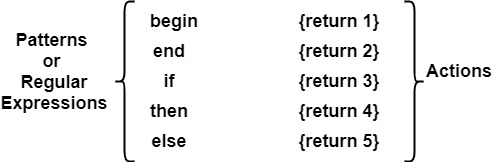


We can see that if Lexical Analyzer is given the input "begin", it will recognize the token "begin" and Lexical Analyzer will return 1 as integer code to the parser.

**Translation Rules for "Identifiers"**

###letter (letter + digit)* {Install ( );return 6}

If Lexical Analyzer is given the token which is an "identifier", then the Action taken by the Lexical Analyzer is to install or store the name in the symbol table & return value 6 as integer code to the parser.
```
*Declarations section start here*/

/* Auxiliary declarations start here*/

%{
	#include <stdio.h>
	int global_variable;
%}

/*Auxiliary declarations end & Regular definitions start here*/

    number [0-9]+           //Regular definition
    op     [-|+|*|/|^|=]    //Regular definition

/*Declarations section ends here*/

%%

/* Rules */

%%

/* Auxiliary functions */
```

# **Yacc**
Yet Another Compiler Compiler (YACC) provides a tool to produce a parser for a given grammar. YACC is a program designed to compile a LALR (1) grammar, that is (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token). It is used to produce the source code of the syntactic analyzer of the language produces by LALR (1) grammar. The input of YACC is the rule or grammar and the output is a C program. The YACC input file is divided into three parts: definition, rules and auxiliary routines part. The output file of YACC is a file named y.tab.c.

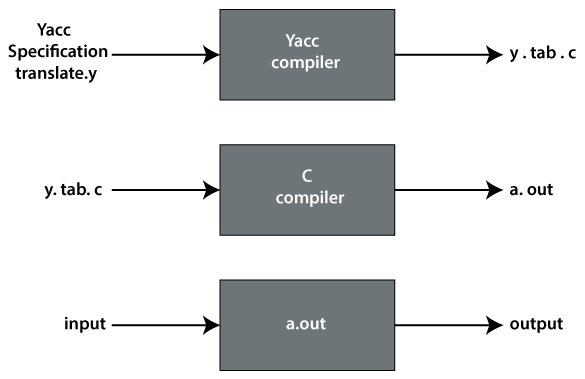

A sample YACC File (.y) is shown below:
```
%{
   #include <ctype.h>
   #include <stdio.h>
   #define YYSTYPE double /* double type for yacc stack */
%}
 
%%
 Lines :  Lines S '\n' { printf("OK \n"); }
       |  S '\n’
       |  error '\n' {yyerror("Error: reenter last line:");
                        yyerrok; };
 S     :  '(' S ')’
       |  '[' S ']’
       |   /* empty */    ;
%%
 
#include "lex.yy.c"
  
void yyerror(char * s)
/* yacc error handler */
{  
 fprintf (stderr, "%s\n", s);
}
  
int main(void)
 {
 return yyparse();
 }
```



# **LAB TWO**

conversion of NFA to DFA
Example 1
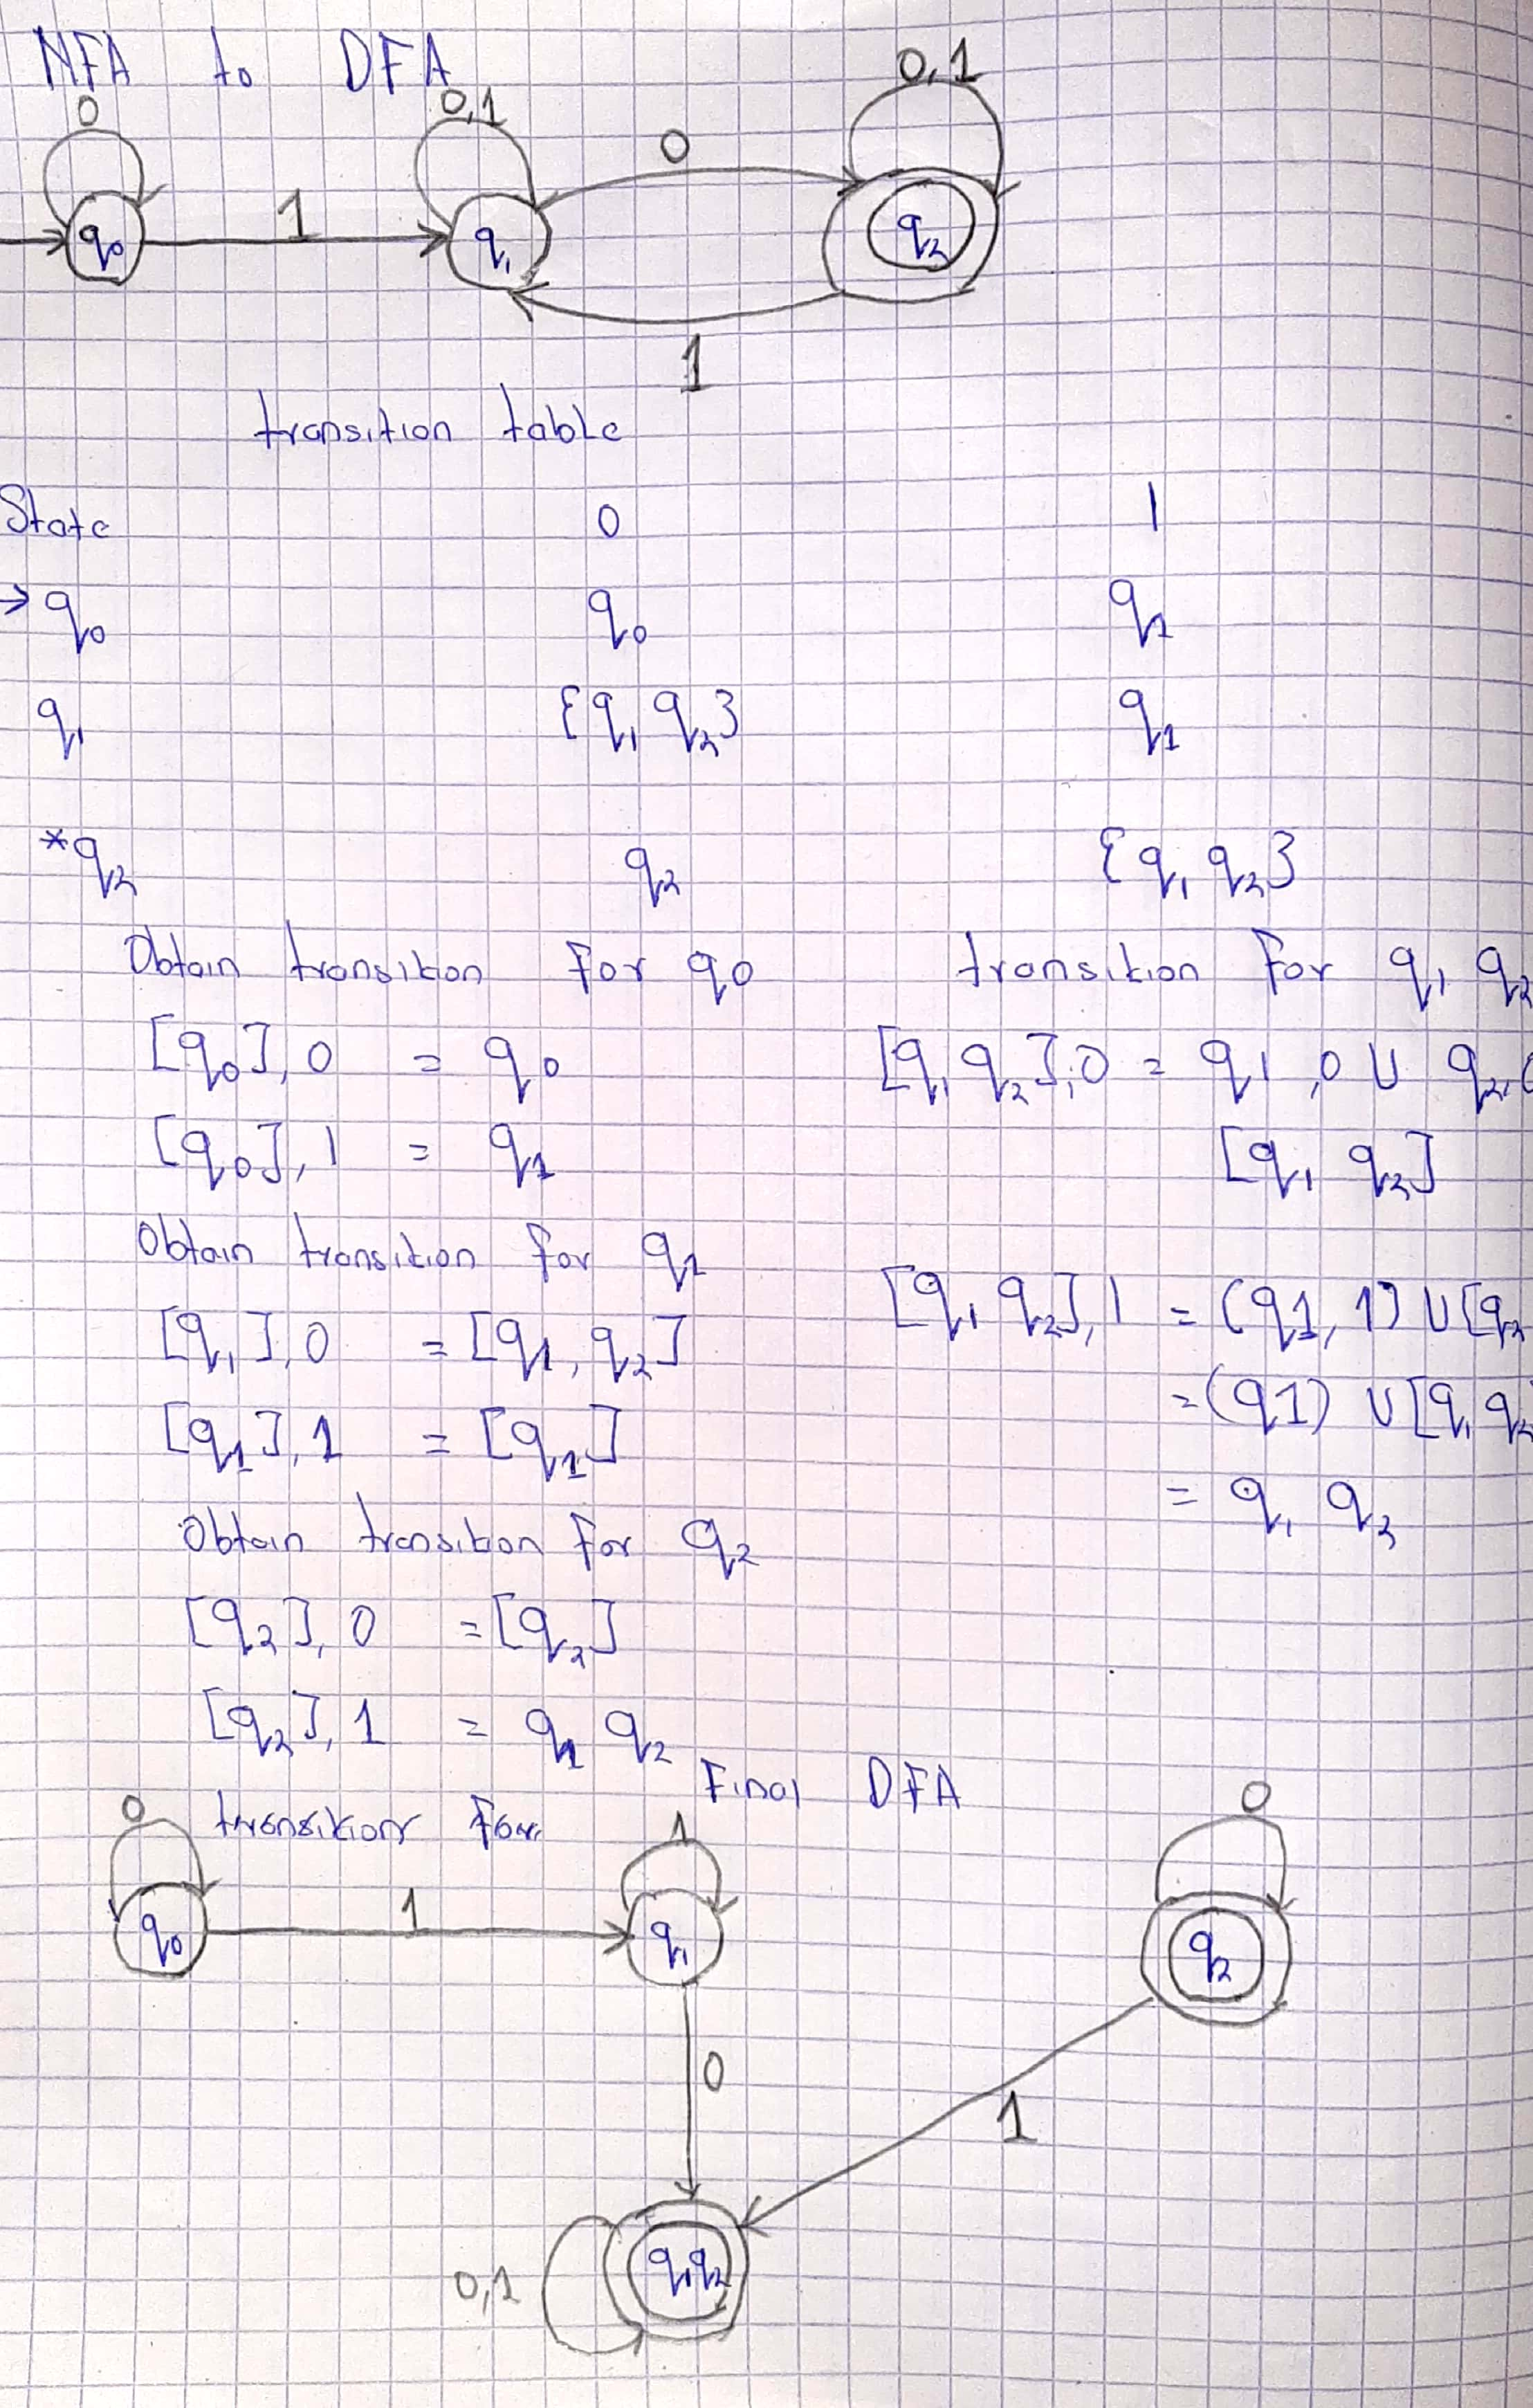


Conversion of NFA TO DFA 
Example 2
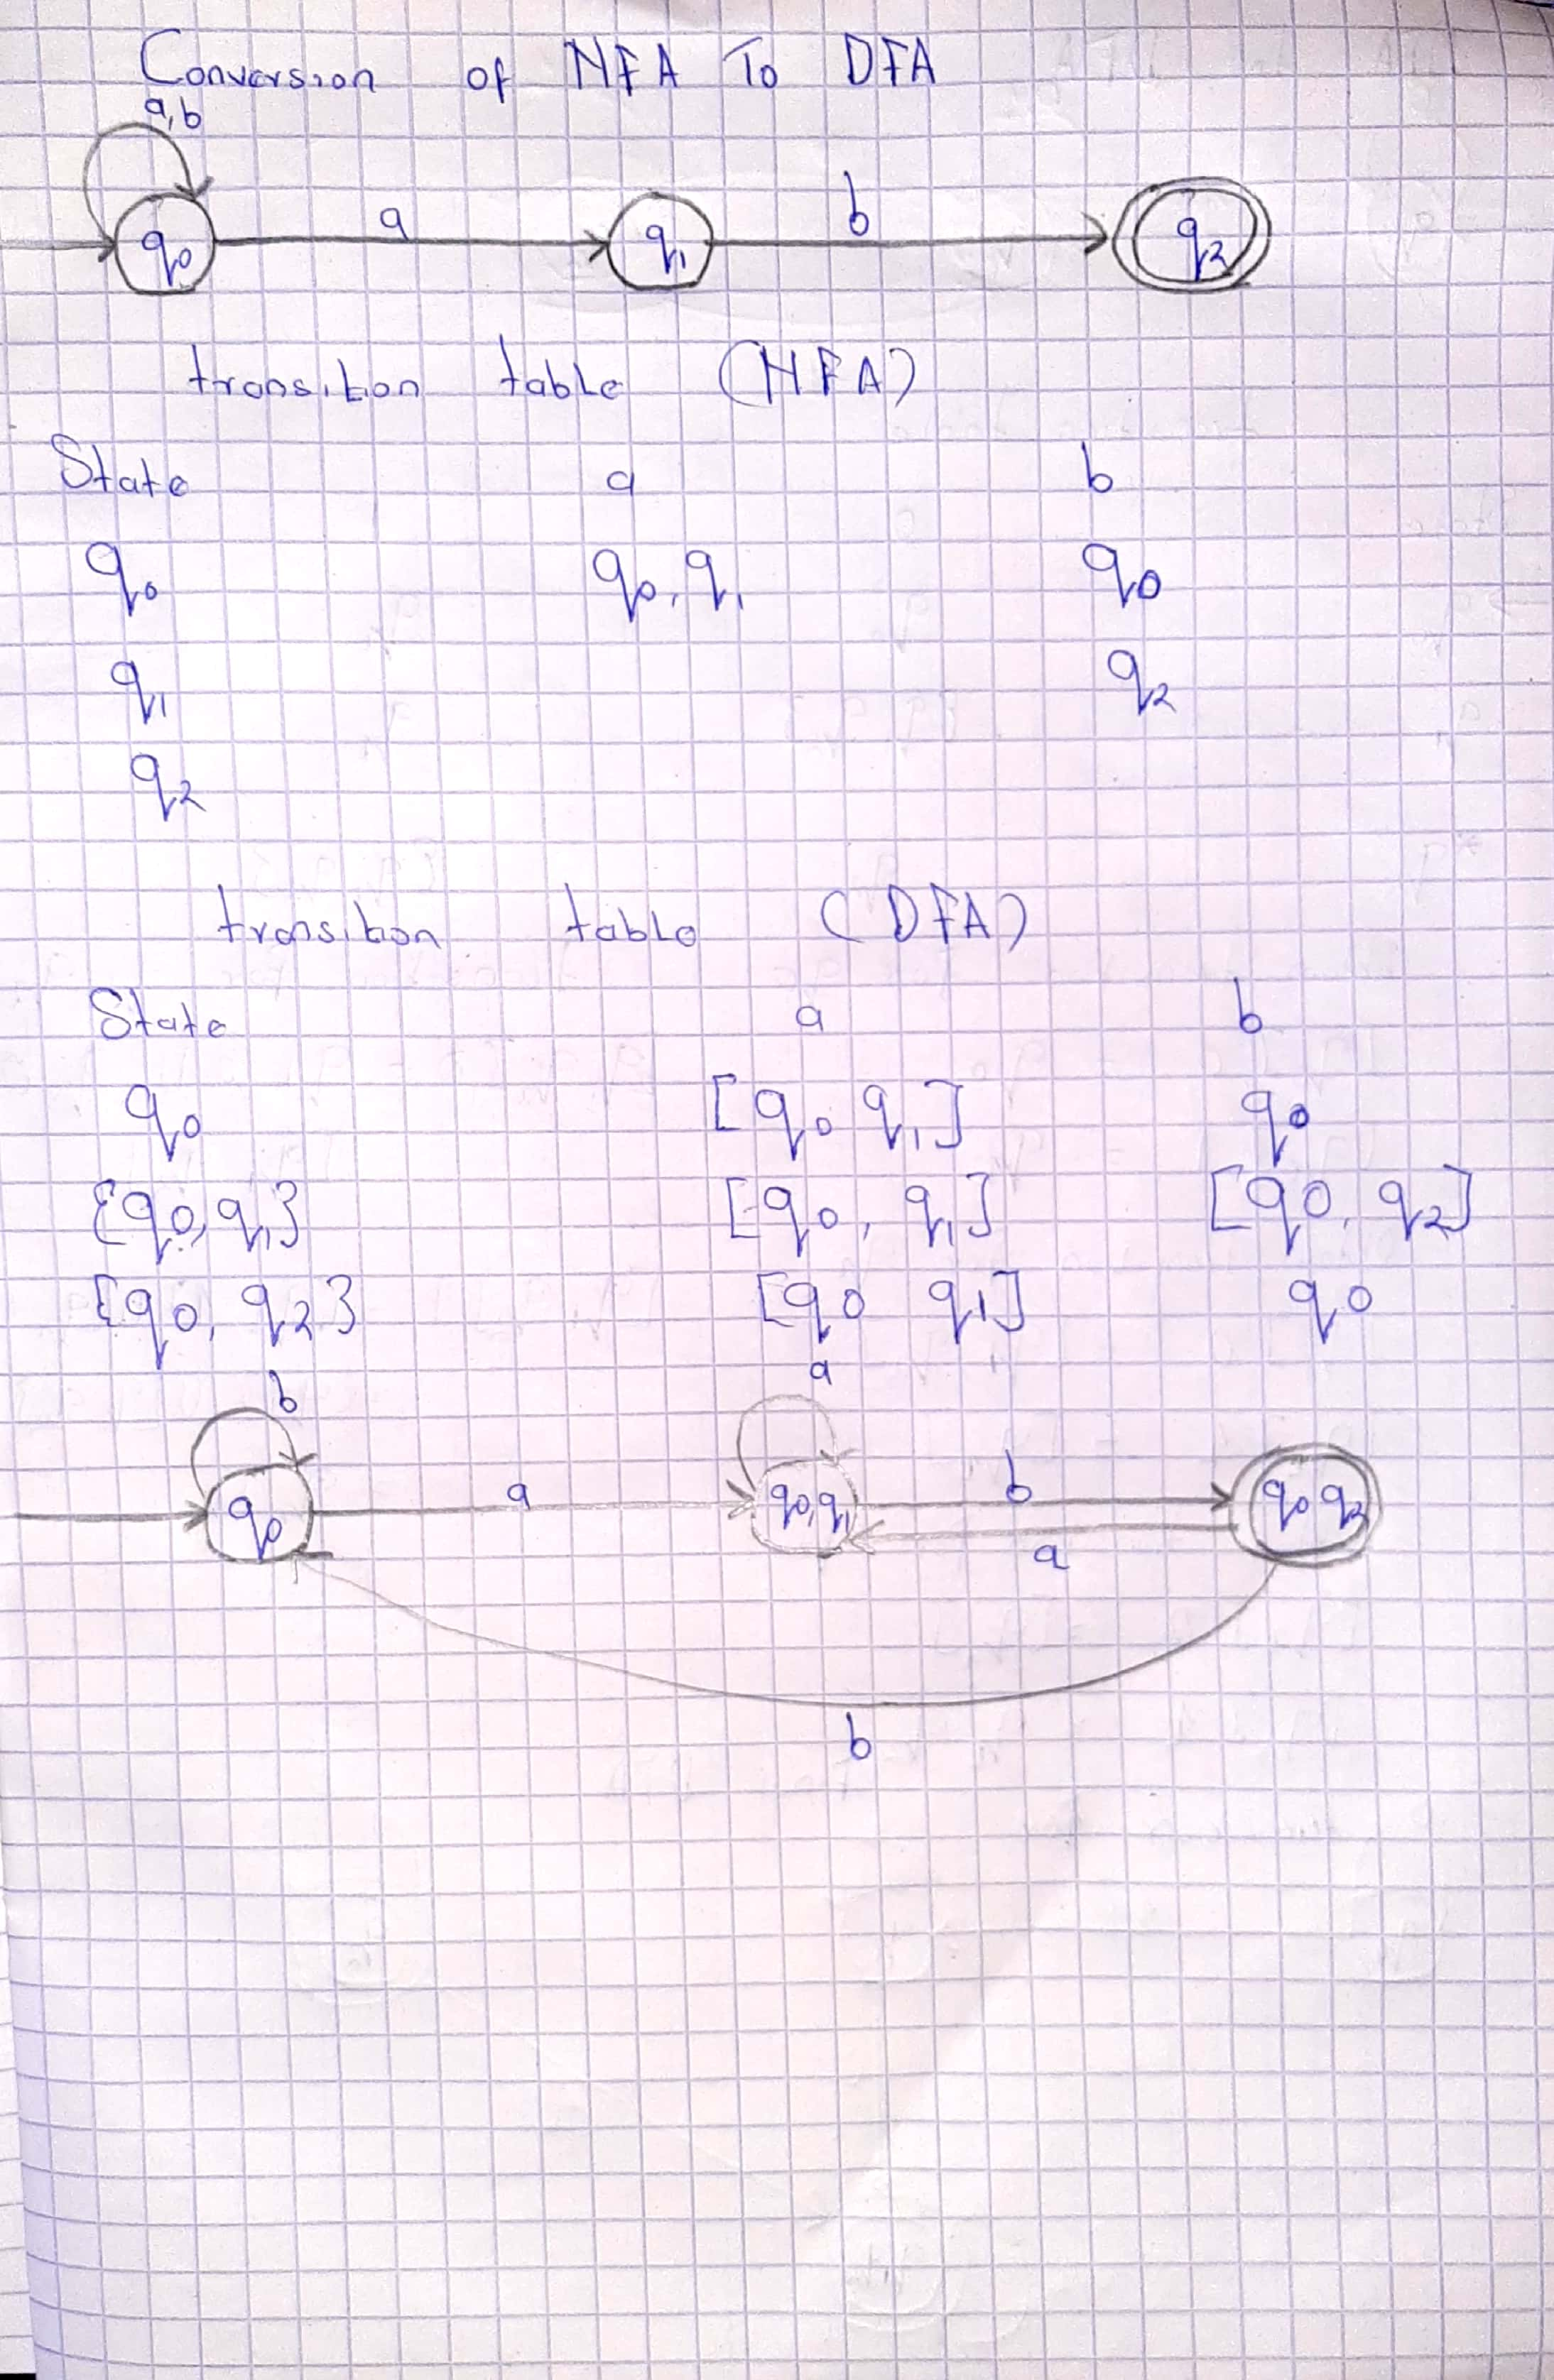

How to use Flex to make a Lexical analyzer

Example: using flex to create an analyzer which count the number of characters in a string.

/*** Definition Section has one variable

which can be accessed inside yylex()

and main() ***/

%{

int count = 0;

%}

/*** Rule Section has three rules, first rule

matches with capital letters, second rule

matches with any character except newline and

third rule does not take input after the enter***/

%%

[A-Z] {printf("%s capital letter\n", yytext);

	count++;}

.	 {printf("%s not a capital letter\n", yytext);}

\n {return 0;}

%%

/*** Code Section prints the number of

capital letter present in the given input***/

int yywrap(){}

int main(){

// Explanation:

// yywrap() - wraps the above rule section

/* yyin - takes the file pointer

		which contains the input*/

/* yylex() - this is the main flex function

		which runs the Rule Section*/

// yytext is the text in the buffer

// Uncomment the lines below

 to take input from file

 FILE *fp;

 char filename[50];

 printf("Enter the filename: \n");

 scanf("%s",filename);

 fp = fopen(filename,"r");

 yyin = fp;

yylex();

printf("\nNumber of Capital letters "

	"in the given input - %d\n", count);

return 0;

}


# **LAB 4**


Using an example or illustration, explain what is predictive parsing

Predictive parsing is a special form of recursive descent parsing, where no backtracking is required, so this can predict which products to use to replace the input string. 

Predictive parser is a recursive descent parser, which has the capability to predict which production is to be used to replace the input string.

The predictive parser does not suffer from backtracking.
To accomplish its tasks, the predictive parser uses a look-ahead pointer, which points to the next input symbols.

To make the parser back-tracking free, the predictive parser puts some constraints on the grammar and accepts only a class of grammar known as LL(k) grammar.

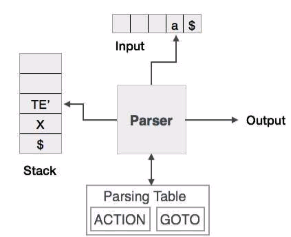

Predictive parser consists of following components:

1. Input Buffer

It consists toindicatedendofinput.∗∗2.Stack∗∗Itconsist to indicate end of stack.

3. Driver Routine

It is a function that drives the Parser.

4. Parser Table

It determines the actions to be carried out by the parser

Predictive parsing uses a stack and a parsing table to parse the input and generate a parse tree.

Both the stack and the input contains an end symbol $to denote that the stack is empty and the input is consumed.

The parser refers to the parsing table to take any decision on the input and stack element combination.
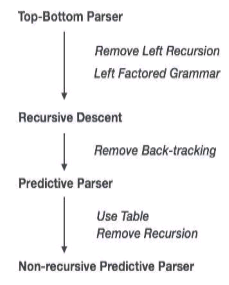

The goal of predictive parsing is to construct a top-down parser that never backtracks. To do so, we must transform a grammar in two ways:

eliminate left recursion

Perform left factoring.

Steps for designing Predictive Parser:

Make the grammar suitable for top-down parser. By performing the elimination of left recursion. And by performing left factoring.

Find the FIRST and FOLLOW of the variables.

Design predictive parser table.

Write predictive parsing algorithm



What is LL (1) parsing?
 
 LL(1) Parsing: Here the 1st L represents that the scanning of the Input will be done from Left to Right manner and the second L shows that in this parsing technique we are going to use Left most Derivation Tree. And finally, the 1 represents the number of look-ahead, which means how many symbols are you going to see when you want to make a decision.

Why do we get the First () and Follow ()

first -It is a function that gives the set of terminals that begin the strings derived from the production rule.

A symbol c is in FIRST (α) if and only if α ⇒ cβ for some sequence β of grammar symbols.

A terminal symbol a is in FOLLOW (N) if and only if there is a derivation from the start symbol S of the grammar such that S ⇒ αNαβ, where α and β are a (possible empty) sequence of grammar symbols. In other words, a terminal c is in FOLLOW (N) if c can follow N at some point in a derivation.

Benefit of FIRST ( ) and FOLLOW ( )

It can be used to prove the LL (K) characteristic of grammar.

It can be used to promote in the construction of predictive parsing tables.

It provides selection information for recursive descent parsers.



Are there any unique attributes associated with Top-Down parsing?

The parse tree is constructed from:


*   The start symbol
*   Then transformed to the input

unlike in Bottom-up parsing where parsing starts with:


*   Input symbols
*   Tries to construct the parse tree up to the start symbol






#Lab Five

1. Review what syntax analysis is and in a few words, describe what this phase of compiler
construction entails.                                                            
 - Syntax analysis, also known as syntax parsing, is the process of checking the syntactical structure of a given input. This means to check whether the given input is in the correct syntax of the language in which the input has been written.  
This is done by building a data structure, called a Parse tree or Syntax tree. The parse tree is constructed by using the pre-defined Grammar of the language and the input string. If the given input string can be produced with the help of the syntax tree during derivation, the input string is found to be in the correct syntax. if not, the error is reported by the syntax analyzer.
2. Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple
syntax analyzer. [Consult the web, show and explain the simple codes that you find].
 - Using the example of a calculator using flex;
```
/* recognize tokens for the calculator and print them out */
%%
"+"    { printf("PLUS\n"); }
"-"    { printf("MINUS\n"); }
"*"    { printf("TIMES\n"); }
"/"    { printf("DIVIDE\n"); }
"|"    { printf("ABS\n"); }
[0-9]+ { printf("NUMBER %s\n", yytext); }
\n     { printf("NEWLINE\n"); }
[ \t]  { }
.      { printf("Mystery character %s\n", yytext); }
%%
```
This recognizes only integers, four basic arithmetic operators, and a unary absolute value operator. The quotes tell flex to use the strings as is, rather than interpreting them as regular expressions. These patterns now provide rules to match anything that the user might enter, basically declaring the syntax.  
The flex library (-lfl) provides a tiny main program that calls the scanner.

Here is the scanner:  
```
$ flex fb1-3.l
$ cc lex.yy.c -lfl
$ ./a.out
12+34
NUMBER 12
PLUS
NUMBER 34
NEWLINE
 5 6 / 7q
NUMBER 5
NUMBER 6
DIVIDE
NUMBER 7
Mystery character q
NEWLINE
^D
$
```
 - First we run flex, which translates the scanner into a C program called lex.yy.c, then we compile the C program, and finally we run it. The output shows that it recognizes numbers as numbers, it recognizes operators as operators, and the q in the last line of input is caught by the catchall pattern at the end.  
Next, we use Bison for parsing: 
```  
/* simplest version of calculator */
%{
#include <stdio.h>
%}
/* declare tokens */  
```%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL
%%
calclist: /* nothing */                       matches at beginning of input
 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
 ;
exp: factor       default $$ = $1 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;
factor: term       default $$ = $1 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;
term: NUMBER  default $$ = $1 
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}
yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}
```
This section contains the rules in simplified BNF.



#References
Web.mit.edu. 2022. Using flex - An Overview of @code{flex}, with Examples. [online] Available at: <http://web.mit.edu/gnu/doc/html/flex_1.html> [Accessed 8 September 2022].

TutorialsPoint. (2022). *What is Lex*. Retrieved from [TutorialsPoint.com](https://www.tutorialspoint.com/what-is-lex#)

Nachiappan V.(2022). *Using Lex*. Retrieved from [github.io/lex.html](https://silcnitc.github.io/lex.html)

Yacc - javatpoint. www.javatpoint.com. (2018). Retrieved September 11, 2022, from https://www.javatpoint.com/yacc 

Introduction to yacc. GeeksforGeeks. (2021, April 29). Retrieved September 11, 2022, from https://www.geeksforgeeks.org/introduction-to-yacc/ 